#  Data Programming with Python Midterm Assignment 

## Student Name : Divya Pariti
## Student Id: 23200831


#### In this Assignment, we will perform Explanatory Data Analysis (EDA) of historic weather data from  Met Eireann, Ireland’s main meteorological service.

# 1. Load in the weather.csv dataset into Python as a pandas DataFrame. Describe the data. How many years of recordings are included? What is the temporal resolution of the data? Which weather measurements are reported? (8 marks)

In [1]:
# Loading all the necesaary packages
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
# The packages that we loaded are - numpy and pandas
# "numpy" is a python programming library used to support large & multi-dimensional arrays and matrices.
# whereas, pandas is a python programming library used for data manipulation and analysis.

# Later on as we require we will load more packages.

In [2]:
# Loading the csv file into the data frame
weather_dataframe = pd.read_csv("weather_1819.csv", skiprows = 11)
# here 'skiprows' is used to skip rows from top while reading the csv file
weather_dataframe.head()
# Now, 'weather_dataframe' is the Dataframe that holds the data

,day,month,year,station,maxtp,mintp,rain,wdsp,hg,sun
0,1,jan,2018,Dublin Airport,7.5,3.2,0.6,18.5,41.0,2.7
1,2,jan,2018,Dublin Airport,11.1,3.4,8.4,17.0,54.0,0.8
2,3,jan,2018,Dublin Airport,8.1,4.6,1.3,23.8,51.0,0.9
3,4,jan,2018,Dublin Airport,9.3,3.4,10.7,14.6,48.0,1.3
4,5,jan,2018,Dublin Airport,6.7,-1.0,0.0,6.6,16.0,3.3


## Describing about the dataset: 

### The data set is a historic weather data collected from Met Eireann, during years 2018 and 2019. Weather_1819 data set covers various topics like location of the measurement, day, month & year of the measurement, maximum and minimum of air temperatures, precipitation amount(measured in mm), wind speed(measured in knots), higest gust(measured in knots) and sunshine duration(measured in hours). 

### Using methods and functions to some more information on the dataset.

In [3]:
# Here, we will use pandas library to analyse and describe more about our data. 
weather_dataframe.describe()
#  above we used 'describe' function that is used to produce statistical outputs on the data in the dataframe. 
#  It returns meaures like count, mean, standard deviation, percentiles, etc as clearly outputed below.

,day,year,maxtp,mintp,rain,wdsp,hg,sun
count,2920.000000,2920.000000,2902.000000,2902.000000,2897.000000,2915.000000,2904.000000,2913.000000
mean,15.720548,2018.500000,13.283150,6.432977,3.063583,9.481475,25.443871,3.783797
std,8.797754,0.500086,5.146289,4.368755,5.053881,3.820605,9.278313,3.850012
min,1.000000,2018.000000,-1.800000,-7.000000,0.000000,2.300000,7.000000,0.000000
25%,8.000000,2018.000000,9.500000,3.100000,0.000000,6.500000,19.000000,0.300000
50%,16.000000,2018.500000,12.800000,6.400000,0.700000,8.900000,24.000000,2.600000
75%,23.000000,2019.000000,17.100000,9.600000,4.000000,11.800000,30.000000,6.300000
max,31.000000,2019.000000,32.000000,18.900000,54.600000,28.500000,84.000000,15.900000


In [4]:
weather_dataframe.nunique()
# above we used 'nunique' function spans each column to find a unique value and returns the number of
# it as the output to the user. dtype here also tells that every entry is saved as a '64-bit' integer.

day         31
month       12
year         2
station      4
maxtp      261
mintp      217
rain       232
wdsp       200
hg          56
sun        156
dtype: int64

In [5]:
weather_dataframe["year"]

0       2018
1       2018
2       2018
3       2018
4       2018
        ... 
2915    2019
2916    2019
2917    2019
2918    2019
2919    2019
Name: year, Length: 2920, dtype: int64

### The data is recorded in 2 years : 2018 & 2019 and has `2920` observations.

### Firstly, temporal time is the duration between capturing two consecutive images/recordings. Hence, we need to identify the column related to time/date values and then calculate the temporal resolution of the data. Also, from the previous step we know that we have `date` and `time` that are time/date columns that have to be converted into a common format.

In [6]:
import warnings
warnings.filterwarnings("ignore")

# Converting date and time columns into one new single column
weather_dataframe['date'] = pd.to_datetime(weather_dataframe['day'].astype(str) + '-' + weather_dataframe['month'] + '-' + weather_dataframe['year'].astype(str))
# .astype(str) is used to concatenate str to str
temptime = weather_dataframe['date'].diff()
change_in_recordings = temptime.value_counts().idxmax()
print("Temporal Resolution of weather_1819 dataset is ", change_in_recordings)


Temporal Resolution of weather_1819 dataset is  1 days 00:00:00


### Dataset covers various parameters out of which the weather measurements are : 
- temperatures, 
- rainfall, 
- wind speeds, 
- highest gust, and 
- sunshine hours

# 2. Determine how many missing values there are in each column of the dataset. Can you think of a reason why these values are missing? Discuss different strategies for filling the missing values, highlighting the advantages and disadvantages of each strategy, in the context of this dataset. (8 marks) 

### Note: You do not need to implement any of your suggested strategies.

In [7]:
# Firstly let's determine the number of missing values in each column in the dataset. 
values = weather_dataframe.isnull()
print(values)

# now let's count the sum of those values
updated_values = values.sum()
print(updated_values)

# calculating the total of those values
updated_values.sum()

        day  month   year  station  maxtp  mintp   rain   wdsp     hg    sun  \
0     False  False  False    False  False  False  False  False  False  False   
1     False  False  False    False  False  False  False  False  False  False   
2     False  False  False    False  False  False  False  False  False  False   
3     False  False  False    False  False  False  False  False  False  False   
4     False  False  False    False  False  False  False  False  False  False   
...     ...    ...    ...      ...    ...    ...    ...    ...    ...    ...   
2915  False  False  False    False  False  False  False  False  False  False   
2916  False  False  False    False  False  False  False  False  False  False   
2917  False  False  False    False  False  False  False  False  False  False   
2918  False  False  False    False  False  False   True  False  False  False   
2919  False  False  False    False  False  False  False  False  False  False   

       date  
0     False  
1     False

87

### Reasons why some data can be missing from the dataset

Understanding that there may be missing values in the dataset is one of the crucial steps in data analysis and data manipulation. This helps better understand the the data and it's relationships inside the dataset. Some of the reasons for missing values include:

a. In time-related datasets, like ours, it is very common that gaps might occur during collection of data in between the time intervals or even data can be collected during irregular time intervals.

b. Weather conditons can even affect our data collection. Severe weather conditions like tornados, lighting, blizzards, cyclones, thunderstorm etc., leads to missing data during those times.

c. Human errors should also be taken into account. If an operator forgets to input a value that also leads to missing values and affects the dataset. 

d. When we record weather we use some weather-specific instruments. The weather-specific instruments require regular checkups to ensure they are accurate. And during those checkups it can be possible that we can expect to get some gaps in the data leading to missing values. 

e. Data corruption and deletion of records can also leads to technical errors which inturn leads to missing values in the data. Even historical data required to produce future results may be unavailable or limited which may leads to gaps and irregularities in our data.

### Strategies for filling values into the data

Filling values into the data is crucial during data preprocessing step as it will influence the data analysis process and it's outputs. Some of the strategies that we can use are:

a. Firstly we perform deletion of missing values from rows and columns. Advantages of doing this is it will remove irregularities in the data. But the disadvantage is, it can cause loss of important information.

b. These missing values can be replaced using mean, median and mode of the respective columns. Advantages of filling the missing data with their mean/median/mode is it is easy to calculate. Diasadvantage is it will reduce our sample size and and loss of information.

c. We can also replace missing values from the data using data imputation. Data Imputation is a process to fill the missing values by estimations. For the given weather data we can use linear imputation, which is assuming data between the points and assigning the values. Advantages of using linear imputation is it would preserve some of the important relations between the data, but the disadvantages are our assumptions sometimes can lead to different outputs thus decreasing the accuracy of the model. 

d. We can also use the strategy of filling the last observation into the recent missing values and it's advantage is it can be used in datasets like ours, but again, the disadvantage is it can distort out data and lead us to wrong assumptions reducing the model's accuracy. 

# 3. Write code to answer the following questions: (15 marks)
    1. At what station and on what date was the highest wind speed recorded?
    2. At what station and on what date was the highest maximum air temperature recorded?
    3. At what station and on what date was the largest amount of rain recorded?

In [8]:
# Q.3.1 Checking for the station that has the highest windspeed record.
# Firstly, let's create column for the date to get the exact output required
weather_dataframe["date"] = weather_dataframe["month"].astype(str) + '-'+ weather_dataframe["day"].astype(str) + '-' + weather_dataframe["year"].astype(str)
# Now, let's check for the record of highest wind speed
# we can tell that highest windspeed record is in "wdsp" column inside the dataset.
maximumspeed = weather_dataframe[weather_dataframe["wdsp"] == weather_dataframe["wdsp"].max()]
# Printing the station name associated with the highest value
station_name = maximumspeed["station"].values[0]
# Printing the date associated with the maximum value
wdsp_date = maximumspeed["date"].values[0]
print(f''' On {wdsp_date}, highest wind speed was recorded at "{station_name}". ''')

 On mar-2-2018, highest wind speed was recorded at "Dublin Airport". 


In [9]:
# Q.3.2 Checking for the station that has highest air temperature record
# Let's check for the record of highest air temperature from the dataset
# We can say that the highest air temperature is in "maxtp" column inside the dataset.
max_air_temp = weather_dataframe[weather_dataframe["maxtp"] == weather_dataframe["maxtp"].max()]
# Printing the station name associated with the highest value
max_air_temp_station = max_air_temp['station'].values[0]
# Printing the date associated with the maximum value
max_air_temp_date = max_air_temp['date'].values[0]
#print(f"Maximum air temperature was recorded at station {max_maxtpstation} on {max_maxtpdate}")
print(f''' On {max_air_temp_date} the highest maximum air temperature was recorded at "{max_air_temp_station}". ''')

 On jun-28-2018 the highest maximum air temperature was recorded at "Shannon Airport". 


In [10]:
# Q.3.3 Checking for the station that has highest rain record
# Let's check for the record in the dataset that has the highest rainfall 
# We can say that highest amount of rain record is in "rain" column inside the dataset
highest_rain = weather_dataframe[weather_dataframe["rain"] == weather_dataframe["rain"].max()]
# Printing out the station name associated with the value
highest_rain_station = highest_rain['station'].values[0]
# Printing out the date associated with it
highest_rain_date = highest_rain['date'].values[0]
print(f''' On {highest_rain_date} the largest amount of rain was recorded at "{highest_rain_station}". ''')

 On apr-15-2019 the largest amount of rain was recorded at "Cork Airport". 


# 4. Create a numerical summary (mean, standard deviation, minimum, maximum, etc.) for each of the weather measurements. Discuss and interpret your results. (8 marks)

In [11]:
###### Let's use the describe function that we used in Q1 to create a numerical summary.
# As disccussed in Q1. describe() function gives the statistical/numerical summaries from the dataframe.
weather_dataframe.describe()

,day,year,maxtp,mintp,rain,wdsp,hg,sun
count,2920.000000,2920.000000,2902.000000,2902.000000,2897.000000,2915.000000,2904.000000,2913.000000
mean,15.720548,2018.500000,13.283150,6.432977,3.063583,9.481475,25.443871,3.783797
std,8.797754,0.500086,5.146289,4.368755,5.053881,3.820605,9.278313,3.850012
min,1.000000,2018.000000,-1.800000,-7.000000,0.000000,2.300000,7.000000,0.000000
25%,8.000000,2018.000000,9.500000,3.100000,0.000000,6.500000,19.000000,0.300000
50%,16.000000,2018.500000,12.800000,6.400000,0.700000,8.900000,24.000000,2.600000
75%,23.000000,2019.000000,17.100000,9.600000,4.000000,11.800000,30.000000,6.300000
max,31.000000,2019.000000,32.000000,18.900000,54.600000,28.500000,84.000000,15.900000


### Ananlysing the above output:

Let's analyse the columns `maxtp`, `mintp`, `rain`, `wdsp`, `hg` & `sun`

Maximum Temperature:

- The mean maximum temperature is 13.28°C.
- By observing the percentiles we can interpret that the minimum temperature is -1.8°C(min) and the maximum temperature is 17.1°C(max).
- The moderate temperature is 32°C that can be interpreted from the standard deviation.
- We can conclude that the temperatures go from slightly colder temperatures to summer heats.

Minimum Temperature:

- The mean of minimum temperature is 6.43°C. 
- By the percentiles we can say that the lowest temperature is -7°C(min) and the highest is 18.9°C(max)
- The standard deviation of minimum temperature sugguests that there is a slight variability i.e,4.3°C.
- Here we can say that temperatures range from colder to mild conditions.

Rainfall:

- The mean rainfall is anticipated at around 3.06mm.
- The variations in rainfall is from the range of 0 mm to 54.6mm(percentiles)
- Standard deviation tells us that 5.05mm is the considerate amount of rainfall.

Wind Speed:

- The mean wind speed is 9.48 knots.
- Range of wind speed is from 2.3knots - 28.5 knots.
- Standard deviation is 3.82knots.
- The dataset covers the wind conditions from calm to moderately breezy days.

Highest Gust:

- The mean gust is at around 25.44knots.
- Highest gust ranges are between 7knots to 84 knots.
- 9.28 knots of standard deviation suggests that there can be variations.
- The dataset also covers all these variation in the gust(low to high).

Sunshine:

- The mean sunshine duration is about 3.78 hours.
- Sunshine hours range between 0hrs to a maximum of 15.9hrs.
- The standard deviation of 3.85hrs indicates variability in sunshine hours.

# 5. Create a graphical summary for each of the weather measurements. Discuss your plots in relation to the summary statistics found in question 4. (10 marks)

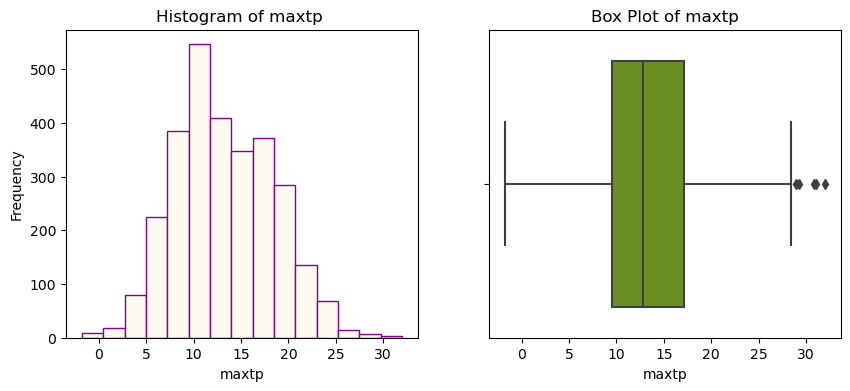

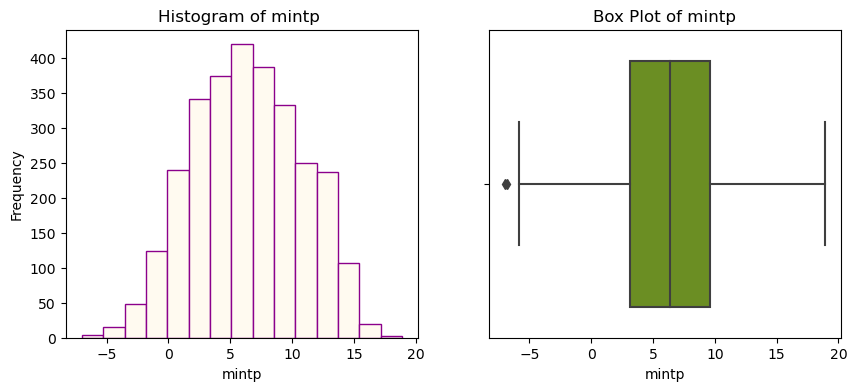

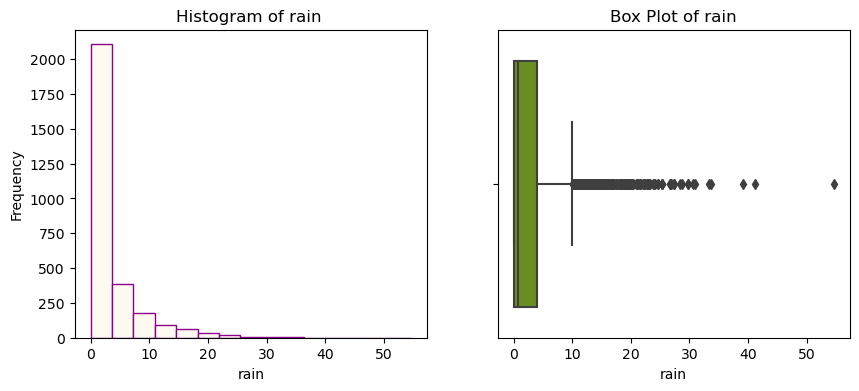

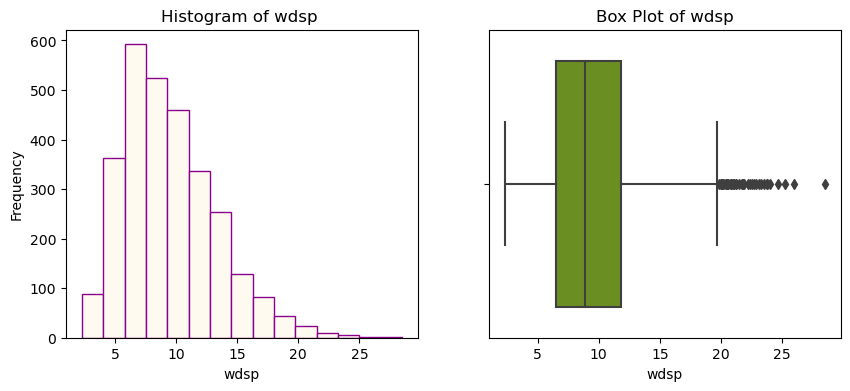

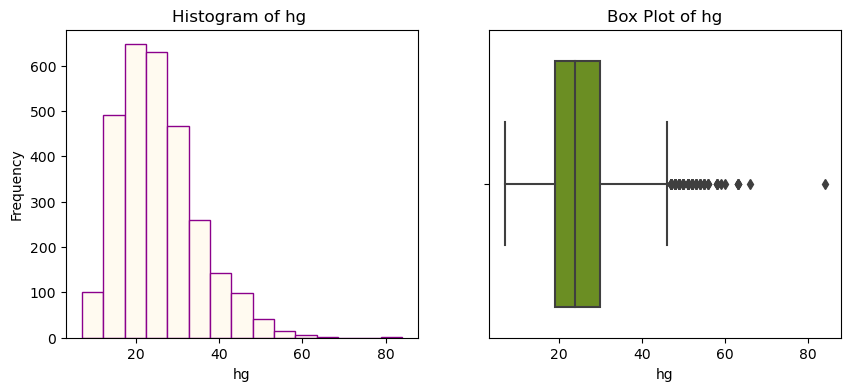

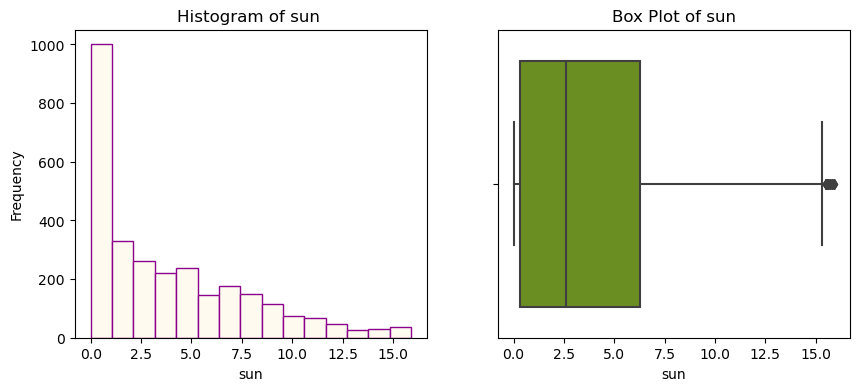

In [12]:
# Loading the required libaries for plotting the summaries
import matplotlib.pyplot as plt
# matplotlib is the plotting library for python, whereas seaborn is data visualization library based on matplotlib
import seaborn as sns

summary = ["maxtp", "mintp", "rain", "wdsp", "hg", "sun"]

bin_colors = ['floralwhite']

for value in summary:
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    # Creating histograms of the summaries
    axs[0].hist(weather_dataframe[value], bins = 15, color=bin_colors, edgecolor = 'darkmagenta')
    axs[0].set_title(f"Histogram of {value} ")
    axs[0].set_xlabel(value)
    axs[0].set_ylabel('Frequency')
   # Building boxplots of the summaries
    sns.boxplot(data = weather_dataframe, x = value, ax = axs[1], boxprops = dict(facecolor = "olivedrab"))
    axs[1].set_title(f'Box Plot of {value}')

    plt.show()

1. Max Temperature:
- Histogram: We can see that the corresponding histogram of `maxtp` seems to right-skewed. This tells us that the data is mostly towards the lower ranges in temperature with a long tail towards higher temperatures. We can also see that there are only few data points at the highest temperatures meaning that higher temperatures are not that common among the data. 

- Boxplot: We can clearly say that there are a few outliers towards the maximum temperatues, which indicates that there are potentially few hotter days. 


2. Min Temperature:
- Histogram: Histogram corresponding to `mintp` is kind of symmetric distribution when compared to that of `maxtp`. The data is spread out evenly around the central value which suggests that data for minimum temperature is well balanced.

- Boxplot: Here in `mintp` the outliers are towards the lower temperatures suggesting that there are a very few colder days. And from the numerical summary we can say that the temperature can lower down to -7°C.


3. Rainfall:
- Histogram: Comparatively histogram of `rain` is postively skewed meaning all the data points are concentrated to the left and this also means that there are very few chances where there was a heavy rainfall. Which means that on most of the days there is very low or no rainfall at all.

- Boxplot: The boxplot shows many outliers above the upper bound of potential outliers in a database, Q3+(1.5*IQR), indicating days with exceptional rainfall.

4. Wind Speed:
- Histogram: We can interpret from that histogram of `windspeed (wdsp)` that it is normally distributed. Again the data is spread out evenly around the central value and our data points for windspeed are well balanced.

- Boxplot: The boxplot for wind speed shows outliers on the higher speed side, suggesting some exceptionally windy days.

5. Highest Gusts:
- Histogram: The histogram for highest gust (hg) appears to be right-skewed. This suggests that the majority of the data points are concentrated towards higher gust values, with a relatively long tail toward lower gust values. Higher gust values are more common in the dataset.

- Boxplot: Fromt the boxplot we can say that there are outliers in the dataset corresponding to  highest gust. All the outliers lie on the maximum side of the graph indicating that there are very high gusts

6. Sunshine Duration:
- Histogram: The histogram of `sun` is again positively skewed. The data points are concentrated towards left side of the grpah. This means that our data has more number of days with less sunshine hours.

- Boxplot: The boxplot again has outliers on the maximum end of the graohn suggesting that there are high sunny days.

# 6. Produce a scatter plot of the mean wind speed versus the highest gust and colour your points based on month. Interpret your plot. (8 marks)

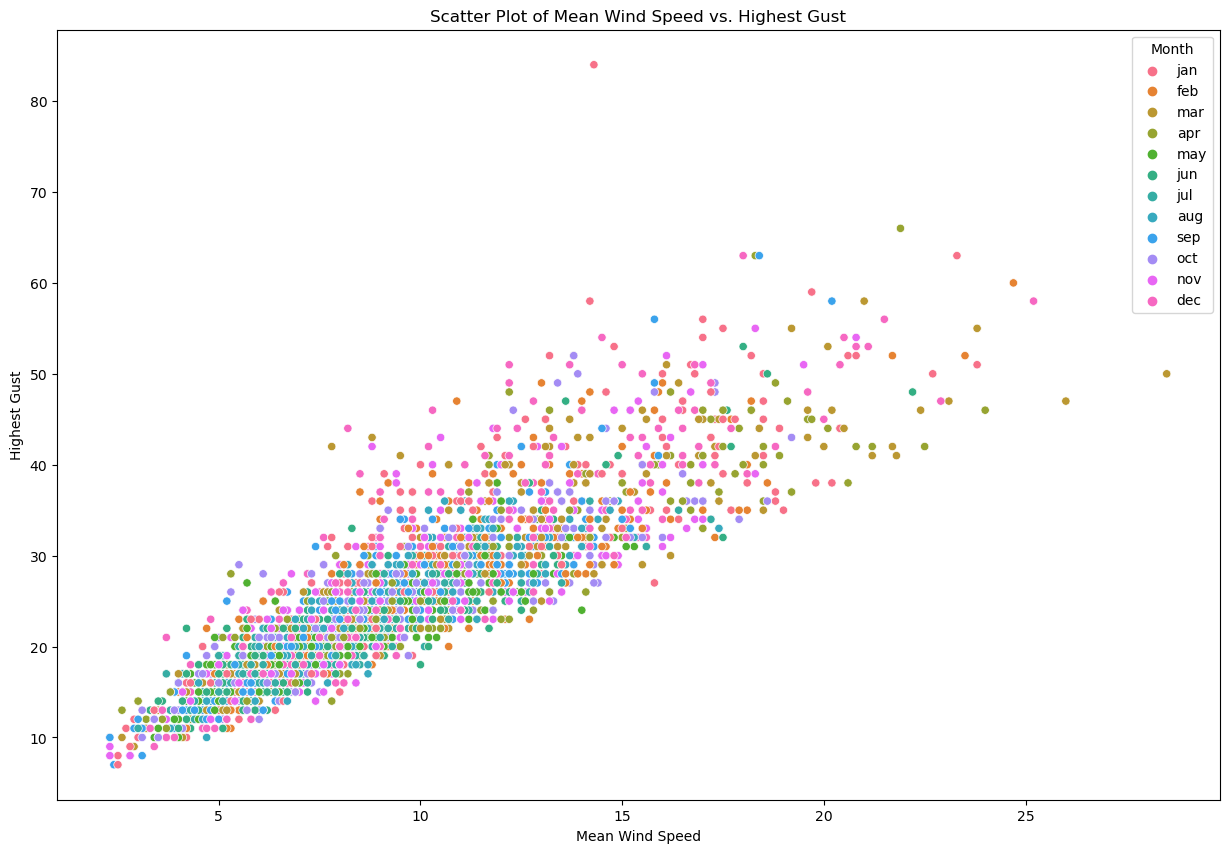

In [13]:
# Building a scatter plot for the mean windspeed and highest gust
plt.figure(figsize=(15, 10))
sns.scatterplot(data = weather_dataframe, x = "wdsp", y = "hg", hue = "month")
# Adding details to the plot
plt.title("Scatter Plot of Mean Wind Speed vs. Highest Gust")
# Adding title of x-axis
plt.xlabel("Mean Wind Speed")
# Adding title of y-axis
plt.ylabel("Highest Gust")
plt.legend(title = "Month", loc = "upper right")

plt.show()

#### Based on the above scatterplot we can say that:
- Months with highest wind speeds and gusts are January, February and December.
- Months with moderate wind speeds and gusts are March, April, September, October and November. 
- Months with lowest wind speeds and gusts are May. June and July, August.

#### Describing the scatterplot:
- We plotted a scatterplot between mean wind speed versus the highest gust, with x-axis representing the mean wind speed and y-axis represting highest gust. 
- Also, as asked every data point represents one single month. 
- It can be clearly anticipated that both mean wind speed and highest gust are directly related to each other. 
- This is because from the plot we can see that whenever the mean wind speed rises the highest gust also increases. 
- As mentioned, during the months of January, February and December we can say that they are colder months henceforth have higher wind speeds and higher gusts. 
- As the temperatures rise in months of March, April, May and June wind speeds and gusts decrease. But again in July and August as the temperatures slightly lowers down the wind speeds and gusts increase, and then again go down in rest of the months till December.

In [14]:
#import matplotlib.pyplot as plt
#import seaborn as sns

# Create a 3x4 grid of subplots
#fig, axes = plt.subplots(3, 4, figsize=(12, 8))

#for i, month in enumerate(weather_dataframe["month"].unique()):
 #   row, col = i // 4, i % 4
  #  ax = axes[row, col]
#
    # Filter the data for the current month and create the scatter plot
 #   data_month = weather_dataframe[weather_dataframe['month'] == month]
  #  sns.scatterplot(data=data_month, x="sun", y="temprange", ax=ax)
   # ax.set_title(f"Month {month}")
    #ax.set_xlabel("Temperature Range")
    #ax.set_ylabel("Sunshine duration (hours)")

    #plt.title("Daily Temperature Range vs. Hours of Sunlight")
    #plt.legend(title = "Month", loc = "upper right")

# Adjust layout
#plt.tight_layout()

#plt.show()

# 7. Compute the daily temperature range, and add this as an additional variable to your DataFrame. Print out the last 10 rows of your DataFrame to show that the column has been added correctly. (5 marks)

In [15]:
# Computing the daily temperature range, and add this as an additional variable to the DataFrame
weather_dataframe["temp_range"] = weather_dataframe["maxtp"] - weather_dataframe["mintp"]
# AS asked printing the last 10 rows of the dataframe to check if the rows have been added correctly or not.
weather_dataframe.tail(10)
# tail() function helps us to get insight into the last values of our dataset and by parsing additional parameters
# into the function we can get our desired number of rows as our output.

,day,month,year,station,maxtp,mintp,rain,wdsp,hg,sun,date,temp_range
2910,22,dec,2019,Knock Airport,7.0,2.7,4.8,8.0,20.0,3.1,dec-22-2019,4.3
2911,23,dec,2019,Knock Airport,6.9,3.0,5.0,10.5,29.0,2.7,dec-23-2019,3.9
2912,24,dec,2019,Knock Airport,6.6,3.1,0.7,8.4,24.0,2.9,dec-24-2019,3.5
2913,25,dec,2019,Knock Airport,4.9,1.4,0.0,9.0,32.0,0.0,dec-25-2019,3.5
2914,26,dec,2019,Knock Airport,10.0,4.8,6.2,12.2,34.0,0.0,dec-26-2019,5.2
2915,27,dec,2019,Knock Airport,10.8,9.8,3.7,12.8,29.0,0.0,dec-27-2019,1.0
2916,28,dec,2019,Knock Airport,9.8,7.9,0.0,14.8,30.0,0.0,dec-28-2019,1.9
2917,29,dec,2019,Knock Airport,10.5,7.0,0.0,12.8,32.0,0.1,dec-29-2019,3.5
2918,30,dec,2019,Knock Airport,9.6,3.4,NaN,8.4,21.0,0.0,dec-30-2019,6.2
2919,31,dec,2019,Knock Airport,6.0,1.3,0.0,7.1,18.0,2.1,dec-31-2019,4.7


# 8. Plot the daily temperature range versus the hours of sunlight per day, colouring the points based on month. Interpret your plot. (8 marks)

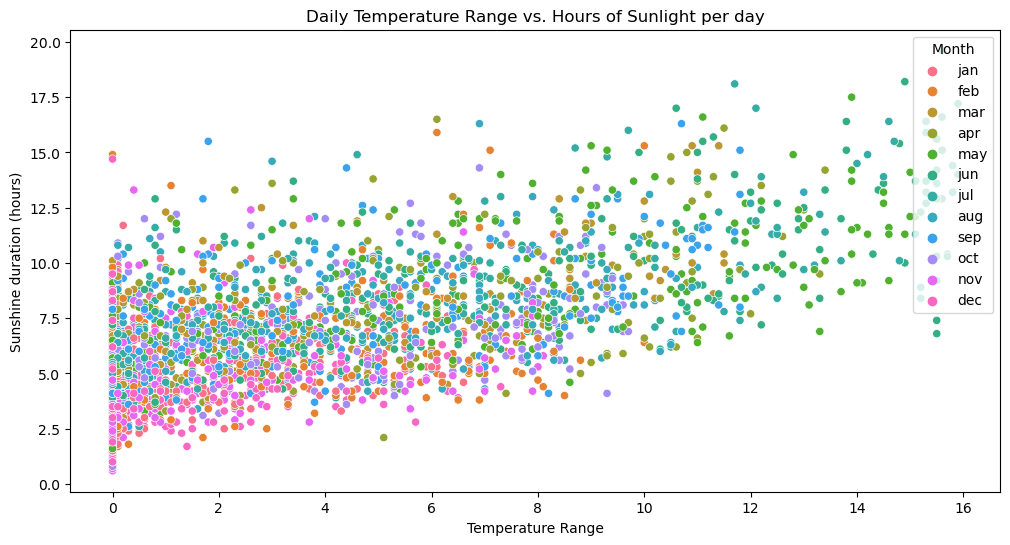

In [16]:
# Building a scatter plot for daily temperature range versus the hours of sunlight per day
plt.figure(figsize=(12, 6))

# Color points based on the month
sns.scatterplot(data = weather_dataframe, x = "sun", y = "temp_range", hue = "month")

# Adding descriptions to our scatterplot
# Firstly, let's add title to it
plt.title("Daily Temperature Range vs. Hours of Sunlight per day")
# Labeling the x-axis
plt.xlabel("Temperature Range")
# Labeling the y-axis
plt.ylabel("Sunshine duration (hours)")
plt.legend(title = "Month", loc = "upper right")

plt.show()

### Decribing the Scatterplot:

- The above scatter plot helps to give us insights into identifying the months with temperature variations and also variations in sunlight hours received.
- It gives us a pettern related to daily temperatures and sunshine durations. 
- We can clearly interpret that there are few months were there is higher amount sunshine hours and maximum temperatures.
- Months like November, December, January and February clearly have lower sunshine hours and daily temperatures recorded than any other months
- This states that there is variability between Temperature range and sunshine duration across different months through out the year.
- The months where we have higher temperatures we can conclude that those are the months with maximum sunshine hours. Hence, we can tell that there is a positive correlation established. And comparatively, we can also conclude the same with the months where we have lower temperatures we will have minimum sunshine hours and therefore a negative correlation can be established.
- Assigning each month a different color let's us differentiate the variations and to identify the outliers.

# 9. Perform a comparative analysis of the weather at Dublin Airport, Shannon Airport and Cork Airport. (20 marks)

    For full marks on this question you should create numerical and graphical summaries of the weather measurements at each weather station and discuss how the weather differs (or is similar) across these locations. 

In [17]:
# Firstlly, let's findout the stations inside our dataframe
weather_dataframe["station"].unique()

array(['Dublin Airport', 'Shannon Airport', 'Cork Airport',
       'Knock Airport'], dtype=object)

In [18]:
# Let's create summaries for the above shown airports as:
dublinair_summ = weather_dataframe[weather_dataframe["station"] == "Dublin Airport"].describe()
shannonair_summ = weather_dataframe[weather_dataframe["station"] == "Shannon Airport"].describe()
corkair_summ = weather_dataframe[weather_dataframe["station"] == "Cork Airport"].describe()

# Let's create a subset of our dataframe by removing "Knock Airport"
weather_subset = weather_dataframe[weather_dataframe["station"]!="Knock Airport"]



         count       mean       std  min    25%   50%     75%   max
Dublin   730.0  13.592603  5.265505 -0.5   9.50  13.0  17.875  26.7
Shannon  723.0  14.160028  5.106169  0.0  10.25  13.6  17.750  32.0
Cork     723.0  13.262517  4.894583 -1.8   9.75  12.5  17.100  26.7


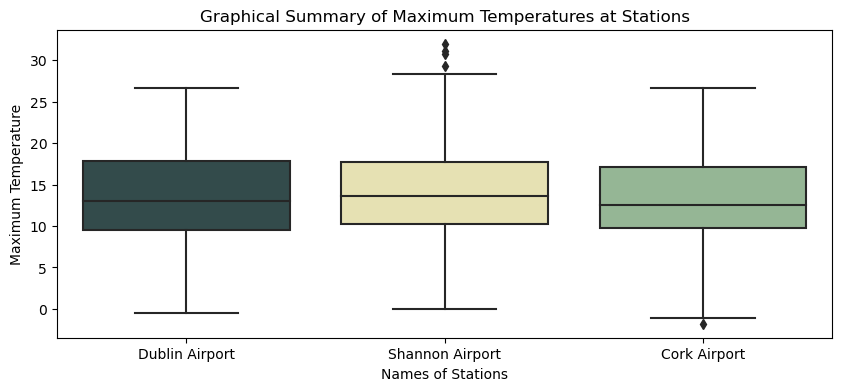

In [19]:
# let's use the above data to display the summaries
new_summ = pd.concat([dublinair_summ["maxtp"], shannonair_summ["maxtp"], corkair_summ["maxtp"]], axis=1)
new_summ.columns = ['Dublin', 'Shannon', 'Cork']
print(new_summ.T)
# Let's build a graphical summary for the above data as well
custom_palette = ['darkslategrey', 'palegoldenrod', 'darkseagreen']
plt.figure(figsize = (10, 4))
sns.boxplot(x = 'station', y = 'maxtp', data = weather_subset, palette=custom_palette)
plt.title('Graphical Summary of Maximum Temperatures at Stations')
plt.xlabel('Names of Stations')
plt.ylabel('Maximum Temperature')
plt.show()


Interpretations:

- All three stations Dublin, Shannon and Cork have maximum temperatures ranging between low to moderate.
- The interquartile range of Cork is similar to that of Shannon which tells us that the temperature variations take place in a particular range.
- From, the numerical summary we can compare and draw to a conclusion that Shannon airport has maximum temperature of 32°C.
- Whereas, Cork airport has the lowest of all the temperatures -1.8°C.
- Shannon also has a slightly higher mean maximum temperature compared to Dublin and Cork.
- From our findings we can say that Shannon station is a warmer place with variations in temperatures.

SNumerical Summary of Minimum Temperatures:

         count      mean       std  min   25%  50%    75%   max
Dublin   730.0  5.724247  4.488748 -5.8  2.40  5.6   8.90  17.8
Shannon  723.0  7.267082  4.442844 -5.0  3.85  7.2  10.85  18.9
Cork     723.0  6.955325  4.203288 -7.0  3.75  7.0   9.90  16.5


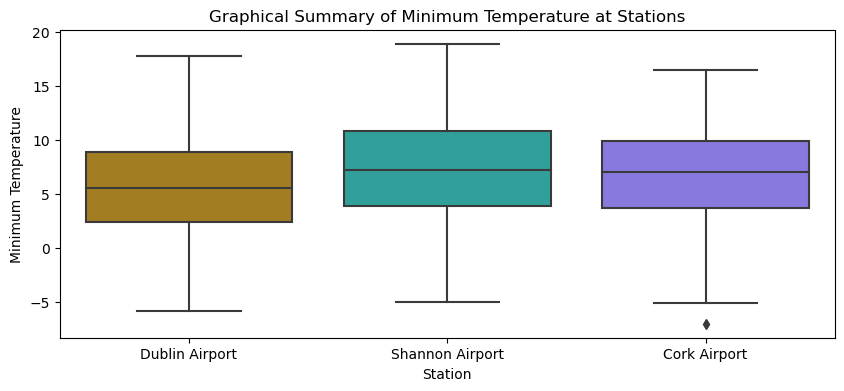

In [20]:
# creating numerical Summary for minimum temperatures for the above airports
new_summ1 = pd.concat([dublinair_summ["mintp"], shannonair_summ["mintp"], corkair_summ["mintp"]], axis=1)
new_summ1.columns = ['Dublin', 'Shannon', 'Cork']
print("SNumerical Summary of Minimum Temperatures:\n")
print(new_summ1.T)

# Creating graphical summaries for the above information
custom_palette = ['darkgoldenrod', 'lightseagreen', 'mediumslateblue']
plt.figure(figsize = (10, 4))
sns.boxplot(x = 'station', y = 'mintp', data = weather_subset, palette=custom_palette)
plt.title('Graphical Summary of Minimum Temperature at Stations')
plt.xlabel('Station')
plt.ylabel('Minimum Temperature')
plt.show()

#### Interpretations:

- From the numerical summary we can say that all three locations have mean minimum temperatures ranging from 5.72°C to 7.27°C.
- The interquartile range for Dublin, Shannon, and Cork is close. Dublin has the highest range with 6.5°C and Cork having the narrowest with 6.15°C.
- Shannon has the highest mean minimum temperature, which means that it is warmer comapared to Dublin and Cork.
- The minimum recorded temperature is with Shannon having the extreme lowest of -5.0°C and Cork having the most extreme low of -7.0°C.
- Dublin has the highest maximum minimum temperature, which tells that it is moderated when compared to Shannon and Cork.


Numerical Summary of Rainfall at the Stations:

         count      mean       std  min  25%  50%   75%   max
Dublin   726.0  2.147383  4.120571  0.0  0.0  0.2  2.30  24.2
Shannon  721.0  2.844383  4.402685  0.0  0.0  0.8  3.90  33.4
Cork     723.0  3.470124  6.137343  0.0  0.0  0.7  4.25  54.6


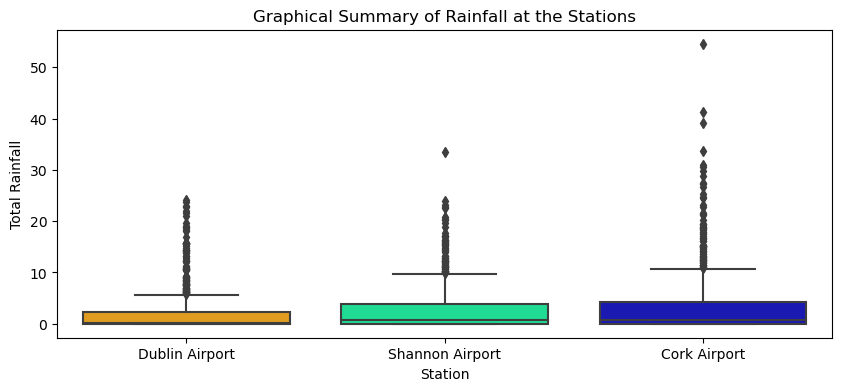

In [21]:
# building summary statistics for rain column
new_summ2 = pd.concat([dublinair_summ["rain"], shannonair_summ["rain"], corkair_summ["rain"]], axis=1)
new_summ2.columns = ['Dublin', 'Shannon', 'Cork']
print("Numerical Summary of Rainfall at the Stations:\n")
print(new_summ2.T)

# creating graphical summaries for total rainfall at the stations
custom_palette = ['orange', 'mediumspringgreen', 'mediumblue']
plt.figure(figsize = (10, 4))
sns.boxplot(x = 'station', y = 'rain', data = weather_subset, palette=custom_palette)
plt.title('Graphical Summary of Rainfall at the Stations')
plt.xlabel('Station')
plt.ylabel('Total Rainfall')
plt.show()

#### Interpretations
- From the numerical summary we can interpret that Dublin, Shannon and Cork have mean total rainfall ranging between 2.15 mm and 3.47 mm.
- The 25th percentile (Q1) shows that a significant portion of the time, these locations experience very little to no rainfall.
- We can also say that Cork on an avergae receives more rainfall wehn comapred to the other two Shannon and Dublin
- Shannon has the highest maximum recorded rainfall, compared to Dublin and Cork
- Next place that receives more rainfall is Cork and then followed by Dublin. This tells us that Shannon receives more rainfall than the other two.
- The standard deviations for all three locations indicate that the total rainfall data is quite variable, with Cork having the highest variability.

Numerical Summary of Windspeeds at the Stations:

         count      mean       std  min  25%   50%   75%   max
Dublin   728.0  9.542720  3.829729  3.0  6.7  8.80  11.5  28.5
Shannon  730.0  9.264658  4.013313  2.3  6.1  8.75  11.7  25.2
Cork     728.0  9.758516  3.749587  2.9  6.7  9.10  12.2  23.8


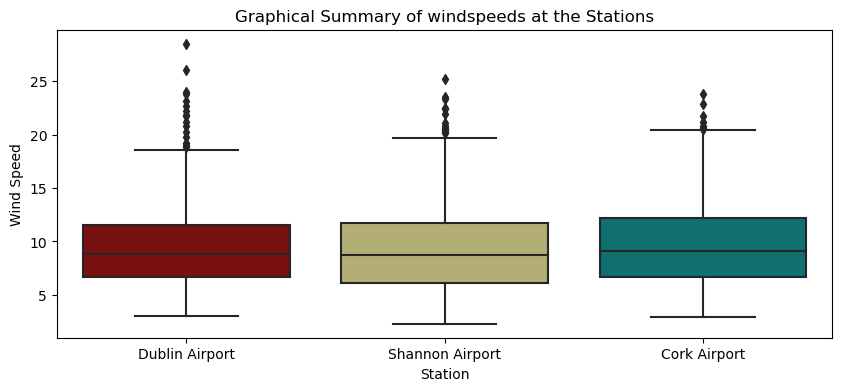

In [22]:
# Creating numerical summary for windspeed for the stations
new_summ3 = pd.concat([dublinair_summ["wdsp"], shannonair_summ["wdsp"], corkair_summ["wdsp"]], axis=1)
new_summ3.columns = ['Dublin', 'Shannon', 'Cork']
print("Numerical Summary of Windspeeds at the Stations:\n")
print(new_summ3.T)

# Visualize the wind speed (wdsp) for each airport
custom_palette = ['darkred', 'darkkhaki', 'teal']
plt.figure(figsize = (10, 4))
sns.boxplot(x = 'station', y = 'wdsp', data = weather_subset, palette=custom_palette)
plt.title('Graphical Summary of windspeeds at the Stations')
plt.xlabel('Station')
plt.ylabel('Wind Speed')
plt.show()

#### Interpretations

- Again from the numerical Summary we can conclude that the mean wind speed for all three locations is relatively close, with values ranging between 9.26 knot and 9.76 knot.
- The interquartile range - Q! and Q3 - for wind speed is similar for Dublin, Shannon and Cork locations, suggesting similar variability.
- Dublin has maximum windspeed when compared to the other 2 locations with 28.5kntos.
- We can also see that Shannon has the lowest windspeed with 25.2knots.
- Observing the highest standard devation, Shannon has the highest standard deviation with 4.01knots than compared to Dublin and Cork.
- But, the recorded windspeed in Shannon is lower than that of Dublin and Cork. It has 2.3 knot windspeed whereas, Dublin and Cork 3.0 knot, 2.9 knot.

Numerical Summary for Highest gusts at the Stations:

         count       mean       std   min   25%   50%   75%   max
Dublin   728.0  24.943681  8.438033   9.0  19.0  24.0  30.0  56.0
Shannon  724.0  24.968232  9.576674   7.0  18.0  24.0  30.0  66.0
Cork     726.0  25.976584  9.336514  10.0  19.0  24.5  32.0  63.0


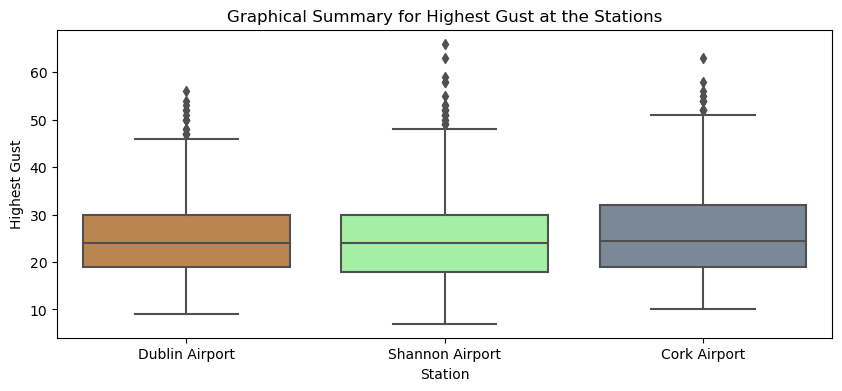

In [23]:
# Creating Numerical Summaries for highest gust for the stations
new_summ4 = pd.concat([dublinair_summ["hg"], shannonair_summ["hg"], corkair_summ["hg"]], axis=1)
new_summ4.columns = ['Dublin', 'Shannon', 'Cork']
print("Numerical Summary for Highest gusts at the Stations:\n")
print(new_summ4.T)

# Graphical Summary for the highest gust for the stations
custom_palette = ['peru', 'palegreen', 'lightslategrey']
plt.figure(figsize = (10, 4))
sns.boxplot(x = 'station', y = 'hg', data = weather_subset, palette=custom_palette)
plt.title('Graphical Summary for Highest Gust at the Stations')
plt.xlabel('Station')
plt.ylabel('Highest Gust')
plt.show()

#### Interpretations
- from the numerical summary we can say that all three locations highest wind gust range from 24.94 knots to 25.98 knots.
- The quartiles, including Q1, Q2 (median), and Q3, are similar among the locations, suggesting consistent wind gust patterns.
- Cork has the highest maximum gust with 63knots and Dublin the lowest with 56knots
- Whereas Shannon has the highest standard deviation with 9.58knots which means that it has wider variations
- When comparing the minimums gusts we can notice that Shannon has lowest when compared to the other two locations

Sunshine duration statistics summary:

         count      mean       std  min  25%  50%   75%   max
Dublin   729.0  4.046091  3.952654  0.0  0.6  2.9  6.60  15.9
Shannon  728.0  3.900275  3.883124  0.0  0.5  2.7  6.50  15.6
Cork     727.0  4.225860  4.055068  0.0  0.3  3.1  7.25  15.7


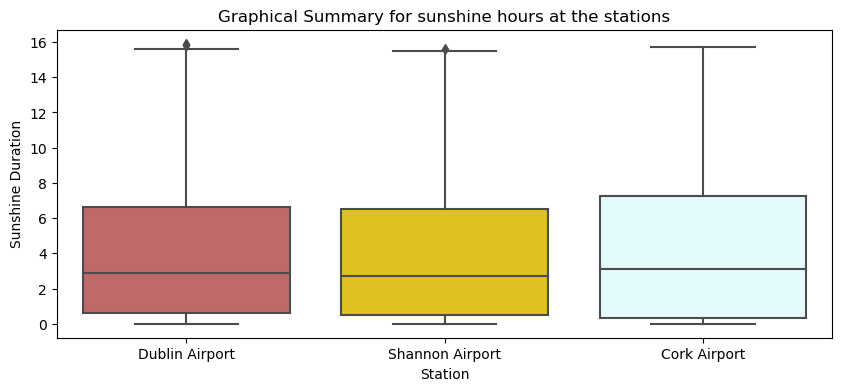

In [24]:
# Bulding Numerical Summary for sunshine hours at the stations
new_summ5 = pd.concat([dublinair_summ["sun"], shannonair_summ["sun"], corkair_summ["sun"]], axis = 1)
new_summ5.columns = ['Dublin', 'Shannon', 'Cork']
print("Sunshine duration statistics summary:\n")
print(new_summ5.T)

# Creating graphical summaries for the sunshine hours at the stations
custom_palette = ['indianred', 'gold', 'lightcyan']
plt.figure(figsize = (10, 4))
sns.boxplot(x = 'station', y = 'sun', data = weather_subset, palette=custom_palette)
plt.title('Graphical Summary for sunshine hours at the stations')
plt.xlabel('Station')
plt.ylabel('Sunshine Duration')
plt.show()

#### Interpretations

- from the numerical summaries, the mean sunshine duration is kind of same among Dublin, Shannon and Cork locations, ranging from approximately 3.90 hours to 4.23 hours per day.
- The quartiles (Q1, Q2, and Q3) are similar among the locations, suggesting consistent patterns in sunshine duration.
- Shannon has the highest sun shine hours when comapred to Dublin and Cork. 
- Shannon has a maximum of 15.6hrs where as Dublin and Cork locations have 15.9 and 15.7hours respectively.
- Comparing the standard deviations for sunshine hours we can say that it stays comparatively consistent with all the locations.
-  Dublin, Shanon and Cork have 3.952654  3.883124  4.055068 mean standard deviations for sunshine hours respectively by which we can conclude that there is no much variability. 